# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 5 ноября 2019, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 5 ноября, -4 балла после 06:00 12 ноября, -6 баллов после 06:00 19 ноября  -8 баллов после 06:00 26 ноября.

При отправлении ДЗ указывайте фамилию в названии файла Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:
[ML0919, Задание 2] Фамилия Имя.<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***


Напомним, что в случае линейной регрессии с L2 регуляризацией мы имеем дело со следующим функционалом:
$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - \langle\,x_i,w\rangle) ^ 2 \right] + \frac{1}{C}\sum_{j=1}^{D}w_j^2 $$

Рассматриваем мини-батч градиентный спуск (в формуле выше $N\rightarrow n$). Получим формулу для обновления весов:


\begin{align}
w_{new} &= w_{old} - \alpha \nabla_w L(w_{old})=\\
&= w_{old} - 2\alpha \left[ \frac{1}{n} \sum_{i=1}^{n} x_i \left(\langle\,x_i,w_{old}\rangle - y_i\right)+
\frac{1}{C}w_{old}\right] = \\
&= w_{old}\left(1 - \frac{2\alpha}{C}\right) - \frac{2\alpha}{n} \sum_{i=1}^{n} x_i \left(\langle\,x_i,w_{old}\rangle - y_i\right) 
\end{align}


Получается, что введение L2 регуляризации влияет на масштабирование $w_{old}$ на каждом шаге. Оставшаяся же часть похожа на взвешанную сумму векторов $x_i$ с коэффициентами $\langle\,x_i,w_{old}\rangle - y_i$.


Отдельно сам градиент представляет собой похожую сумму:
$$\frac{2}{n} \sum_{i=1}^{n} x_i \left(\langle\,x_i,w_{old}\rangle - y_i\right)+
\frac{2}{C}w_{old}$$
масштабированный вектор $w_{old}$, сдвинутый в сторону среднего градиента $\frac{1}{n}\sum_{i} (y_i - \langle\,x_i,w\rangle) ^ 2$ по мини-батчу $x_1\ldots x_n$. Т.е. свдинутый в сторону роста функции потерь.

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***

В случае логистической регрессии с L2 регуляризацией у нас есть следующий функционал:
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log \sigma( \langle\,x_i,w\rangle ) + ( 1 - y_i) \log (1 - \sigma( \langle\,x_i,w\rangle )) \right] +  \frac{1}{C}\sum_{i=1}^{D}w_i^2$$


Рассматриваем мини-батч градиентный спуск (в формуле выше $N\rightarrow n$). Чтобы найти градиент, сначала посчитаем частную производную.


\begin{align}
-\frac{\partial}{\partial w_j} L(w) &= \frac{1}{n} \sum_{i=1}^{n}
\left[
y_i \frac{1}{\sigma( \langle\,x_i,w\rangle )} \frac{\partial \sigma( \langle\,x_i,w\rangle )}{\partial w_j} -
(1-y_i)\frac{1}{1 - \sigma( \langle\,x_i,w\rangle )} \frac{\partial \sigma( \langle\,x_i,w\rangle )}{\partial w_j}
\right] + 
\frac{2}{C}w_j = \\
&= \frac{1}{n} \sum_{i=1}^{n} \frac{\partial \sigma( \langle\,x_i,w\rangle )}{\partial w_j}
\left[
\frac{y_i}{\sigma( \langle\,x_i,w\rangle )} - \frac{1-y_i}{1- \sigma( \langle\,x_i,w\rangle )}
\right] + \frac{2}{C}w_j = \\
&= \frac{1}{n} \sum_{i=1}^{n} \frac{\partial \sigma( \langle\,x_i,w\rangle )}{\partial w_j}
\left[
\frac{y_i - \sigma( \langle\,x_i,w\rangle )}{\sigma( \langle\,x_i,w\rangle )(1- \sigma( \langle\,x_i,w\rangle ))}
\right] + \frac{2}{C}w_j = \\
&= \frac{1}{n} \sum_{i=1}^{n} x_i^j
\left[
y_i - \sigma( \langle\,x_i,w\rangle )
\right] + \frac{2}{C}w_j
\end{align}


Так как $\frac{\partial \sigma( \langle\,x_i,w\rangle )}{\partial w_j} = x_i^j \sigma( \langle\,x_i,w\rangle ) (1 - \sigma( \langle\,x_i,w\rangle ))$.


Тогда средний градиент по мини-батчу будет выглядеть следующим образом:
\begin{align}
\frac{1}{n}\sum_{i=1}^{n} x_i
\left(
\sigma( \langle\,x_i,w\rangle ) - y_i
\right) + \frac{2}{C}w
\end{align}

И соответственно обновление весов:
\begin{align}
w_{new} = w_{old} - \alpha \left( \frac{1}{n}\sum_{i=1}^{n} x_i
\left(
\sigma( \langle\,x_i,w_{old}\rangle ) - y_i
\right) + \frac{2}{C}w_{old} \right) = \\
= w_{old}\left(1 - \frac{2\alpha}{C}\right) -  \frac{\alpha}{n}\sum_{i=1}^{n} x_i(
\sigma( \langle\,x_i,w_{old}\rangle ) - y_i)
\end{align}


Теперь уже визуально видна схожесть формул обновления весов в случае линейной регресси и логистической. Соответственно будет и похожая интерпретация - масштабирование $w_{old}$, и градиент снова представляет взвешенную суммы векторов мини-батча $x_1\ldots x_n$.

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***
Минимизируем функционал
\begin{align}
L(w) &=  \frac{1}{N}\sum_i (y_i - \langle\,x_i,w\rangle) ^ 2 = 
\frac{1}{N}||X \cdot w - Y||^2 = \frac{1}{N}(Xw-y)^T(Xw-y)
\end{align}

Продифференцируем векторно один раз:
\begin{align}
\nabla_w L(w) = \frac{1}{N}\left(
2X^TXw - 2 X^Ty
\right)
\end{align}

И еще раз:
\begin{align}
    \nabla_w \nabla_w L(w) = \frac{2}{N}X^TX
\end{align}

Форма $X^TX$ положительно определена т.к. $\forall w$ имеем $ w^TX^TXw = (Xw)^T(Xw) = ||Xw||^2\geq 0$, где равенство нулю в случае ненулевого вектора $w$ означает линейную зависимость столбцов матрицы $X^TX$, что противоречит условию о полном ранге.


В случае модели с L2 регуляризацией:
\begin{align}
L(w) &=  \frac{1}{N}\sum_i (y_i - \langle\,x_i,w\rangle) ^ 2 + \frac{1}{C}||w||^2= 
\frac{1}{N}||X \cdot w - Y||^2 + \frac{1}{C}||w||^2 =\\
&= \frac{1}{N}\left(X \cdot w - y \right)^T
\left( X \cdot w - y \right) + \frac{1}{C}w^Tw
\end{align}


Cвойства векторного дифференцирования:
\begin{align}
\nabla_w w^T c &= \nabla_w c^T w = c \\
\nabla_w \left(w^T C w \right) &= \left(C + C^T \right)w
\end{align}


Теперь векторно продифференцируем $L(w)$:
\begin{align}
\nabla_w L(w) &= \nabla_w \frac{1}{N}\left(
w^TX^TXw - w^TX^Ty - y^TXw + y^Ty \right) + \nabla_w \frac{1}{C}w^Tw = \\
&= \frac{2}{N} \left(
X^TXw - X^Ty
\right) + \frac{2}{C}w = 0
\end{align}

Откуда находим решение:
\begin{align}
w = \left( X^TX + \frac{N}{C}E \right)^{-1} X^Ty
\end{align}


В общем случае матрица $X^TX$ может быть вырожденной (признаки линейно зависимые) и обратной матриц существовать не будет. Варьируя же $C$ можно получить уже обратимую матрицу, что делает возможным считать точное решение. Однако это также очень затратно т.к. обращение матрицы имеет кубическую сложность.

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***

\begin{align}
\mathbb{E}(L|x_i) &= -p(y_i=1|x_i)\log a(x_i) - p(y_i=0|x_i)\log(1-a(x_i)) = \\
&= -p(y_i=1|x_i)\log a(x_i) - (1- p(y_i=1|x_i)) \log(1-a(x_i))
\end{align}

То есть нам нужно максимизировать функцию
\begin{align}
f(x) = a\log(x) + (1-a)\log(1-x) \\
\frac{d}{dx} f(x) = \frac{a}{x} - \frac{1-a}{1-x} = \frac{a-x}{x(1-x)},
\end{align}
где знаменатель положителен т.к. $x \in (0,1)$. Таким образом, точка максимума $x = a$, т.к. при $x\in(0,a)$ производная положительная (функция возрастает), а при $x\in(a,1)$ производная отрицательна (функция убывает).


Таким образом, $a(x_i) = p(y_i=1|x_i)$ минимизирует математическое ожидание.

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

Регуляризация борется с большими весами т.к. если вес $w_j$ огромный, то маленькое изменение в одном из признаков (что говорит о сильной схожести объектов) приведет к значительному изменению предсказания модели.

Вес $w_0$ стоит при фиктивном признаке $X_0 = 1$ Т.е. этот признак у всех объектов одинаковый и равен $1$ и весь при нем не надо учитывать в регуляризации.

Т.к. $w \cdot x = 0$ задает разделяющую гиперплоскость, то свободный член $w_0$ отвечает за сдвиг этой гиперплоскости.

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [1]:
def fib(max_iter=7):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [2]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 4 fib values: 3
Fib num: 5 fib values: 5
Fib num: 6 fib values: 8


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [3]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 4 fib values: 3
Fib num: 5 fib values: 5
Fib num: 6 fib values: 8
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 4 fib values: 3
Fib num: 5 fib values: 5
Fib num: 6 fib values: 8
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 4 fib values: 3
Fib num: 5 fib values: 5
Fib num: 6 fib values: 8


А вот так уже нельзя.

In [4]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 4 fib values: 3
Fib num: 5 fib values: 5
Fib num: 6 fib values: 8


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [2]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    size = X.shape[0]
    indices = np.arange(size)
    if shuffle:
        indices = np.random.permutation(indices)
    for i in range(0, size, batch_size):
        tmp_indices = indices[i: np.min([size, i + batch_size])]
        X_batch = X[tmp_indices]
        y_batch = y[tmp_indices]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [268]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, batch_size=1, C=1, alpha=0.01, max_epoch=10,
                 model_type='lin_reg', threshold=0.5):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        self.threshold = threshold
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_size = batch_size
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type == 'lin_reg':
            vect_norm = np.linalg.norm(np.dot(X_batch, self.weights) - y_batch) ** 2
            reg_vect = np.linalg.norm(self.weights[1:]) ** 2
            loss = (vect_norm / X_batch.shape[0]) + (reg_vect / self.C)
        if self.model_type == 'log_reg':
            loss = np.mean(-y_batch * np.log(sigmoid(np.dot(X_batch, self.weights)))
                            + (y_batch - 1) * np.log(1 - sigmoid(np.dot(X_batch, self.weights))))
            + 1 / self.C * np.linalg.norm(self.weights) ** 2
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        b_size = X_batch.shape[0]
        if self.model_type == 'lin_reg':
            vect = np.dot(X_batch.T, (np.dot(X_batch, self.weights) - y_batch))
            reg_vect = self.weights
            loss_grad = (2 * vect / b_size) + (2 * reg_vect / self.C)
        if self.model_type == 'log_reg':
            loss_grad = 2 / X_batch.shape[0] * np.dot(sigmoid(np.dot(X_batch, self.weights)) - 
                                                      y_batch, X_batch) + 2 / self.C * self.weights
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights = self.weights - self.alpha * new_grad
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        np.random.seed(0)
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        # Нужно инициализровать случайно веса
        self.weights = np.random.random(X.shape[1])
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, batch_size=self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        if self.model_type == 'lin_reg':
            y_hat = np.dot(X, self.weights)
        if self.model_type == 'log_reg':
            y_hat = np.sign(sigmoid(np.dot(X, self.weights)) - self.threshold).astype('int64')
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [212]:
def plot_decision_boundary(clf):
    x_1 = np.linspace(-4, 5, 10)
    x_2 = -clf.weights[1] / clf.weights[2] * x_1 - clf.weights[0] / clf.weights[2]
    plt.plot(x_1, x_2)

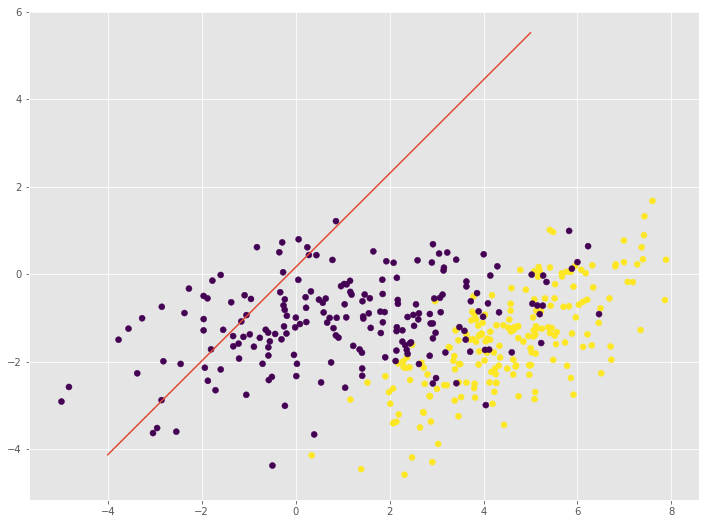

In [213]:
np.random.seed(0)
plt.figure(figsize=(12,9))

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

clf = MySGDClassifier(batch_generator, alpha=0.001, C=100)
clf.fit(X, y)

plot_decision_boundary(clf)

plt.scatter(X[:,0], X[:,1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [214]:
from sklearn.datasets import make_classification

In [215]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

Text(0, 0.5, 'Loss averaging')

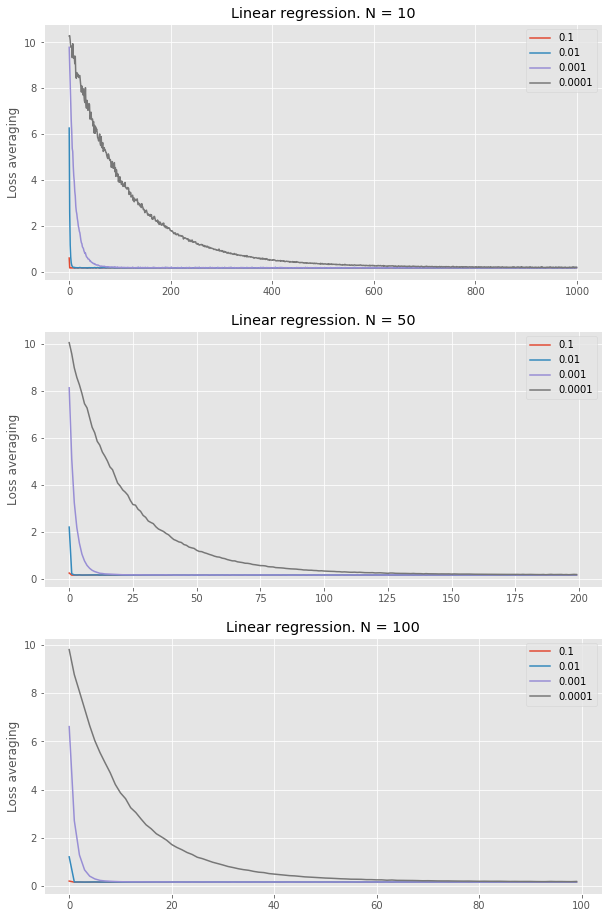

In [216]:
fig = plt.figure(figsize=(10,16))
subplot_1 = fig.add_subplot(311)
subplot_2 = fig.add_subplot(312)
subplot_3 = fig.add_subplot(313)
N_1 = 10
N_2 = 50
N_3 = 100
for a in [0.1, 0.01, 0.001, 0.0001]:
    clf = MySGDClassifier(batch_generator, alpha=a, batch_size=100)
    clf.fit(X, y)
    subplot_1.plot(np.mean(np.array(clf.errors_log['loss']).reshape(-1, N_1), axis=1), label=a)
    subplot_2.plot(np.mean(np.array(clf.errors_log['loss']).reshape(-1, N_2), axis=1), label=a)
    subplot_3.plot(np.mean(np.array(clf.errors_log['loss']).reshape(-1, N_3), axis=1), label=a)
subplot_1.legend()
subplot_1.set_title("Linear regression. N = 10")
subplot_1.set_ylabel("Loss averaging")
subplot_2.legend()
subplot_2.set_title("Linear regression. N = 50")
subplot_2.set_ylabel("Loss averaging")
subplot_3.legend()
subplot_3.set_title("Linear regression. N = 100")
subplot_3.set_ylabel("Loss averaging")

Text(0, 0.5, 'Loss averaging')

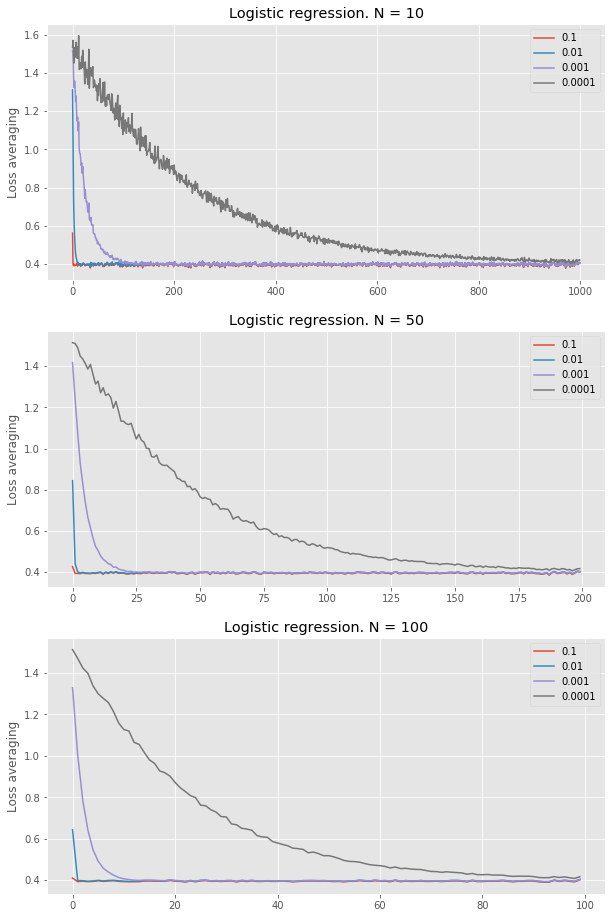

In [217]:
fig = plt.figure(figsize=(10,16))
subplot_1 = fig.add_subplot(311)
subplot_2 = fig.add_subplot(312)
subplot_3 = fig.add_subplot(313)
N_1 = 10
N_2 = 50
N_3 = 100
for a in [0.1, 0.01, 0.001, 0.0001]:
    clf = MySGDClassifier(batch_generator, alpha=a, batch_size=100, model_type='log_reg')
    clf.fit(X, y)
    subplot_1.plot(np.mean(np.array(clf.errors_log['loss']).reshape(-1, N_1), axis=1), label=a)
    subplot_2.plot(np.mean(np.array(clf.errors_log['loss']).reshape(-1, N_2), axis=1), label=a)
    subplot_3.plot(np.mean(np.array(clf.errors_log['loss']).reshape(-1, N_3), axis=1), label=a)
subplot_1.legend()
subplot_1.set_title("Logistic regression. N = 10")
subplot_1.set_ylabel("Loss averaging")
subplot_2.legend()
subplot_2.set_title("Logistic regression. N = 50")
subplot_2.set_ylabel("Loss averaging")
subplot_3.legend()
subplot_3.set_title("Logistic regression. N = 100")
subplot_3.set_ylabel("Loss averaging")

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Видна зависимость скорости сходимости от выбора параметра `alpha`. В рассматриваемом случае `alpha` равные $0.1,\;0.01$ обеспечивают быструю сходимость.

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

In [218]:
np.seterr(all="ignore")

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

Text(0, 0.5, 'Average weight')

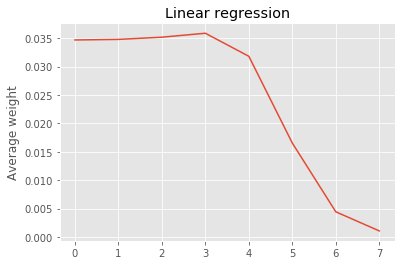

In [219]:
avg_c = []
for C in np.logspace(3, -3, 10):
    clf = MySGDClassifier(batch_generator, batch_size=1000, C=C)
    clf.fit(X, y)
    avg_c.append(np.mean(clf.weights))
plt.plot(avg_c)
plt.title("Linear regression")
plt.ylabel("Average weight")

Text(0, 0.5, 'Average weight')

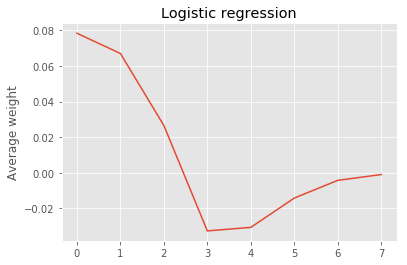

In [220]:
avg_c = []
for C in np.logspace(3, -3, 10):
    clf = MySGDClassifier(batch_generator, batch_size=1000, C=C, model_type='log_reg')
    clf.fit(X, y)
    avg_c.append(np.mean(clf.weights))
plt.plot(avg_c)
plt.title("Logistic regression")
plt.ylabel("Average weight")

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [239]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [240]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [241]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [242]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [243]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

/home/nikita/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/nikita/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Посмотрим на среднюю ошибку на последнем батче для значения батча из `[5, 10, 50, 100, 200, 500]`.

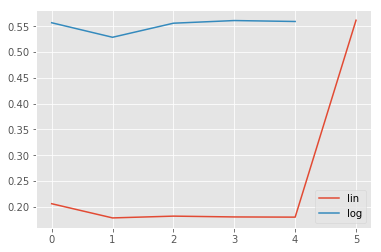

In [249]:
loss_for_lin = []
loss_for_log = []
for b_size in [5, 10, 50, 100, 200, 500]:
    clf1 = MySGDClassifier(batch_generator, batch_size=b_size)
    clf1.fit(X_train, y_train)
    loss_for_lin.append(np.mean(clf1.errors_log['loss'][-1: -b_size-1:-1]))
    clf2 = MySGDClassifier(batch_generator, batch_size=b_size, model_type='log_reg')
    clf2.fit(X_train, y_train)
    loss_for_log.append(np.mean(clf2.errors_log['loss'][-1:-b_size-1:-1]))
plt.plot(loss_for_lin, label='lin')
plt.plot(loss_for_log, label='log')
plt.legend()

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

Используем `KFold` для валидации.

In [250]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

Будем подбирать параметры из следующих.

In [282]:
var_c = [100, 10, 1, 0.1, 0.01]
var_al = [0.1, 0.05, 0.01]
var_me = [5, 10, 20]
var_mt = ['lin_reg', 'log_reg']
var_thr = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
all_params = [var_c, var_al, var_me, var_mt, var_thr]

In [283]:
from itertools import product

In [284]:
result_params = [0, 0, 0, 0, 0]
result_score = 0.

for C, al, me, model, thr in list(product(*all_params)):
    clf = MySGDClassifier(batch_generator, batch_size=50, alpha=al, C=C, max_epoch=me, model_type=model)
    if model == 'log_reg':
        folds = kf.split(X_train)
        tmp = []
        for train, test in folds:
            clf.fit(X_train[train], y_train[train])
            tmp.append(f1_score(y_train[test], clf.predict(X_train[test]), average='weighted'))
        mean_fscore = np.mean(np.array(tmp))
        if mean_fscore > result_score:
            result_score = mean_fscore
            result_params[0] = C 
            result_params[1] = al
            result_params[2] = me
            result_params[3] = model
            result_params[4] = thr
    if model == 'lin_reg':
        folds = kf.split(X_train)
        tmp = []
        for train, test in folds:
            clf.fit(X_train[train], y_train[train])
            tmp.append(f1_score(y_train[test], (clf.predict(X_train[test]) >= thr).astype('int64')))
        mean_fscore = np.mean(np.array(tmp))
        if mean_fscore > result_score:
            result_score = mean_fscore
            result_params[0] = C 
            result_params[1] = al
            result_params[2] = me
            result_params[3] = model
            result_params[4] = thr
        
print(result_params)
print(result_score)

/home/nikita/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nikita/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/nikita/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[100, 0.05, 20, 'lin_reg', 0.3]
0.6127649628170859


Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

Подбирали $thr$ выше.

In [289]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    #target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

In [293]:
y_test = []
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        #y_test.append(target_id)
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
#y_test = np.array(y_test)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)

(16627, 15) (16627,)


In [294]:
X_test = scaler.fit_transform(X_test)

/home/nikita/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/nikita/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [295]:
clf = MySGDClassifier(batch_generator, batch_size=50, C=100, alpha=0.05, max_epoch=20)

In [296]:
clf.fit(X_train, y_train)

MySGDClassifier(C=100, alpha=0.05,
        batch_generator=<function batch_generator at 0x7f9cac1b5ae8>,
        batch_size=50, max_epoch=20, model_type='lin_reg', threshold=0.5)

In [300]:
prediction = (clf.predict(X_test) >= 0.3).astype('int64')

In [301]:
result = pd.DataFrame({'pair_id' : range(11691, 28318), 'target': prediction})
result.to_csv('solution.csv', index=False)

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук прислать Ваш ник на kaggle, под которым Вы залили решение, которое побило первый бейзлайн. **

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***